# **Task 11**

## Question 1

In [6]:
!pip install opendatasets

In [7]:
import pandas as pd
import numpy as np

In [8]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/titanic-dataset")

Skipping, found downloaded files in "./titanic-dataset" (use force=True to force download)


In [9]:
df = pd.read_csv("/content/titanic-dataset/Titanic-Dataset.csv")

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
X = df.drop(columns ='Survived')
y = df['Survived']

In [12]:
X.drop(columns = ['Name','Ticket','Cabin'],inplace = True)

In [13]:
X.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [14]:
X.Age.fillna(X.Age.mean(),inplace = True)

/tmp/ipython-input-3257663006.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.Age.fillna(X.Age.mean(),inplace = True)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])
X['Fare'] = scaler.fit_transform(X[['Fare']])

In [16]:
X = pd.get_dummies(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred = log_model.predict(X_test)

In [21]:
print("Accuracy Score: " + str(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.7988826815642458


In [23]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(log_model, X, y, cv = 5, scoring = 'accuracy')
print("Cross Validation Score mean: " + str(cv_score.mean()))
print("cross Validation Score: " + str(cv_score))

Cross Validation Score mean: 0.785638064151654
cross Validation Score: [0.78212291 0.78651685 0.78089888 0.76966292 0.80898876]


The k-fold gives the average accuracy of the model which is more robust and we can say that accuracy is **not by chance it** .

## Question 2

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
depths = [2,3,4,5,6,7,8,9,10]
acc = []
val = []
for depth in depths:
  dec_model = DecisionTreeClassifier(max_depth=depth)
  dec_model.fit(X_train,y_train)
  train_pred = dec_model.predict(X_train)
  val_pred = dec_model.predict(X_test)
  acc.append(accuracy_score(y_train,train_pred))
  val.append(accuracy_score(y_test,val_pred))

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

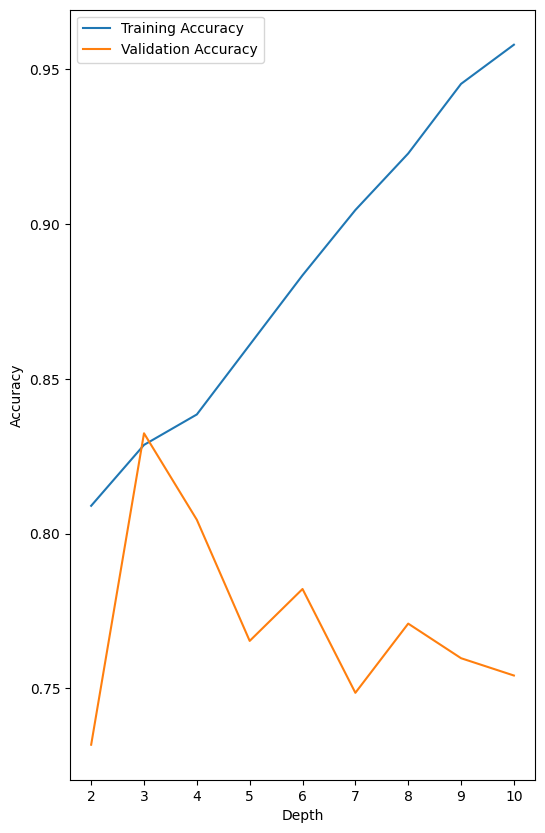

In [37]:
plt.figure(figsize= (6, 10))
plt.plot(depths, acc, label = 'Training Accuracy')
plt.plot(depths, val, label = 'Validation Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see the model have reached the maximum accuracy at 3 deapth after that thr model start begining **overfitting**

## Question 3

In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [39]:
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))
print("Precision Score: {:.4f}".format(precision_score(y_test, y_pred)))
print("Recall Score: {:.4f}".format(recall_score(y_test, y_pred)))

F1 Score: 0.7313
Precision Score: 0.8167
Recall Score: 0.6622


## Question 4

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

In [44]:
y_pred = dec_model.predict_proba(X_test)[:, 1]

In [45]:
tpr, fpr, threshold = roc_curve(y_test, y_pred)

In [47]:
au = roc_auc_score(y_test, y_pred)
print("AUC Score: {:.4f}".format(au))

AUC Score: 0.7056


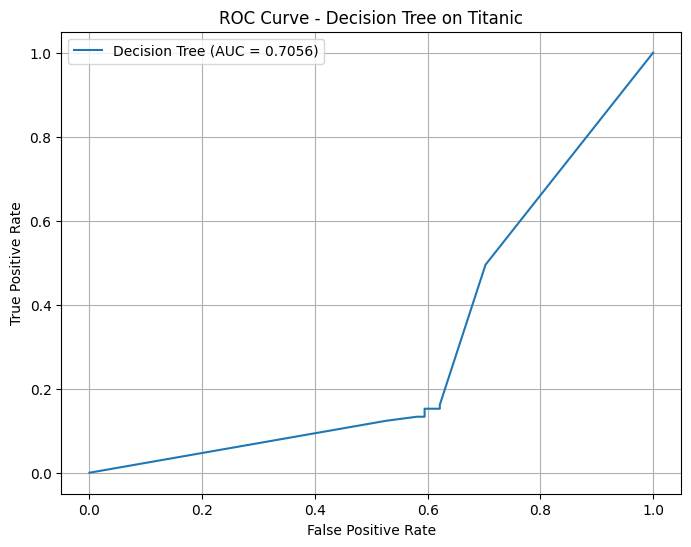

In [48]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {au:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree on Titanic')
plt.legend()
plt.grid(True)
plt.show()


We can see that hte model becomes more random after **0.6** Accuracy Score

## Question 5

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_pred = model.predict(X_test)

In [54]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Precision Score: {:.4f}".format(precision_score(y_test, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))

Accuracy: 0.8045
Precision Score: 0.7746
F1 Score: 0.7586


In [55]:
dec_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dec_model.fit(X_train, y_train)
y_pred_dt = dec_model.predict(X_test)

In [56]:
print("Decision Tree Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_dt)))
print("Decision Tree Precision Score: {:.4f}".format(precision_score(y_test, y_pred_dt)))
print("Decision Tree F1 Score: {:.4f}".format(f1_score(y_test, y_pred_dt)))

Decision Tree Accuracy: 0.7989
Decision Tree Precision Score: 0.7969
Decision Tree F1 Score: 0.7391


**Logistic Regression** has more accuracy then **Decision Trees**

## Question 6

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred_rf = model.predict(X_test)
print("Random Forest Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))

Random Forest Accuracy: 0.8380


In [61]:
val_accu = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')
print("Cross Validation Score mean: {:.4f}".format(val_accu.mean()))

Cross Validation Score mean: 0.8093


## Question 7

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
estim = [1, 10, 50 , 100, 200]
rate = [0.01, 0.1, 0.2, 0.3]
results = []

In [65]:
for es in estim:
  for r in rate:
    model = GradientBoostingClassifier(n_estimators=es, learning_rate = r)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_test, model.predict(X_test))
    results.append({'n_estimators': es, 'learning_rate': r, 'train_acc': train_acc, 'val_acc': val_acc})


results_df = pd.DataFrame(results)


In [66]:
print(results_df)

    n_estimators  learning_rate  train_acc   val_acc
0              1           0.01   0.623596  0.586592
1              1           0.10   0.623596  0.586592
2              1           0.20   0.643258  0.592179
3              1           0.30   0.811798  0.770950
4             10           0.01   0.623596  0.586592
5             10           0.10   0.835674  0.804469
6             10           0.20   0.845506  0.798883
7             10           0.30   0.870787  0.815642
8             50           0.01   0.811798  0.770950
9             50           0.10   0.879213  0.826816
10            50           0.20   0.917135  0.821229
11            50           0.30   0.945225  0.810056
12           100           0.01   0.835674  0.798883
13           100           0.10   0.904494  0.815642
14           100           0.20   0.959270  0.787709
15           100           0.30   0.990169  0.804469
16           200           0.01   0.845506  0.798883
17           200           0.10   0.952247  0.

In [71]:
n = np.argmax(results_df['val_acc'])
results_df.iloc[n]

,9
n_estimators,50.000000
learning_rate,0.100000
train_acc,0.879213
val_acc,0.826816


## Question 8

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Train Gradient Boosting Classifier
gb_model =  RandomForestClassifier()
gb_model.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
y_pred_gb = gb_model.predict(X_test)

precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
accuracy_score(y_test, y_pred)

print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")
print(f"Accuracy: {f1_gb:.4f}")

Precision: 0.8261
Recall: 0.7703
F1-Score: 0.7972
Accuracy: 0.7972


The accuracy is less than Random Forest

## Question 9

AUC Score (Gradient Boosting): 0.8974


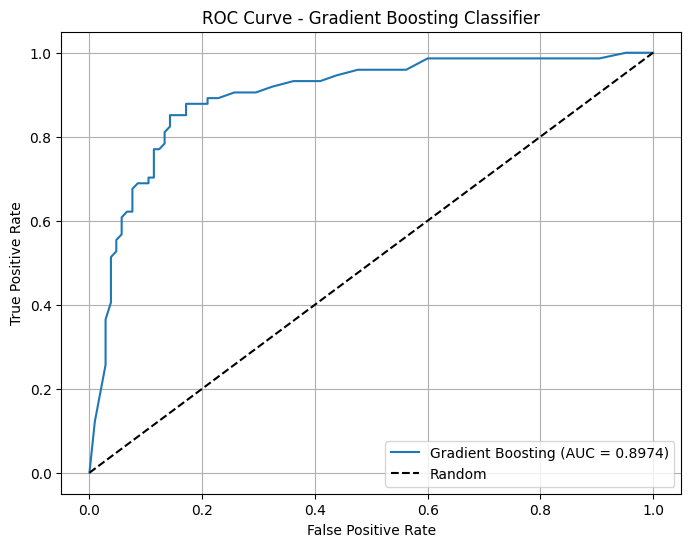

In [85]:
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

print(f"AUC Score (Gradient Boosting): {auc_gb:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend()
plt.grid(True)
plt.show()

Model with AUC = 0.89 is far from random. It is actually doing quite well at distinguishing survivors vs. non-survivors on Titanic.

## Question 10

In [108]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.svm import SVC

In [109]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [110]:
svm_model = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

In [111]:
models = [
    ('SVM', svm_model),
    ('Random Forest', rf_model),
    ('Gradient Boosting', gb_model)
]

In [112]:
for name, model in models_to_evaluate:
    # Get predictions for all folds
    y_pred = cross_val_predict(model, X, y, cv=skf)

    # Compute probabilities if the model supports it
    try:
        y_pred_prob = cross_val_predict(model, X, y, cv=skf, method='predict_proba')[:,1]
    except:
        y_pred_prob = y_pred

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, zero_division=0)
    rec = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y, y_pred_prob)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

results_df = pd.DataFrame(results)
print(results_df)

               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0                SVM  0.616163   0.000000  0.000000  0.000000  0.743448
1      Random Forest  0.809296   0.801929  0.667008  0.720346  0.859938
2  Gradient Boosting  0.805919   0.788639  0.655371  0.702652  0.861308
3                SVM  0.616162   0.000000  0.000000  0.000000  0.817781
4      Random Forest  0.831650   0.820000  0.719298  0.766355  0.876519
5  Gradient Boosting  0.832772   0.820598  0.722222  0.768274  0.876857
